# Projet SVM

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import pandas as pd
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.cluster import KMeans

## Data
### Jeu de données IRIS

In [2]:
iris=datasets.load_iris()

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


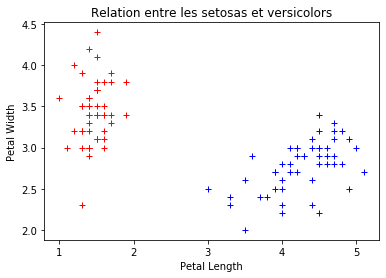

In [48]:
#affichage des données 
#print(iris)
#print(iris.data)
print(iris.feature_names)
#print(iris.target)
print(iris.target_names)
#plt.plot(iris.data[:len(iris.target==0),1],iris.data[:len(iris.target==0),2], '+')
plt.show()
red = []
redy = []
blue = []
bluy = []

#Pour pouvoir représenter les données et le séparateur, on ne regarde les données que sur 2 dimensions dans cette partie
for i in range(len(iris.data)):
    if (iris.target[i] == 0):
        red += [iris.data[i,2]]
        redy += [iris.data[i,1]]
    elif (iris.target[i] == 1):
        blue += [iris.data[i,2]]
        bluy += [iris.data[i,1]]
    

plt.plot(red, redy, 'r+')
plt.plot(blue, bluy, 'b+')
plt.xlabel('Petal Length')
plt.ylabel('Sepal Width')
plt.title('Relation entre les setosas et versicolors')
x = np.linspace(0,10,150)
y = np.zeros((150))
for i in range(len(x)):
    y = 0.1*x + 2

plt.show()


In [4]:
#Stockage des données utilisées
x = []
y = []
for i in range(len(iris.target)):
    if (iris.target[i] == 1) or (iris.target[i] == 0):
        x += [iris.data[i,1:3].tolist()]
        if iris.target[i] == 0:
            y += [-1]
        else:
            y += [1]

x = np.array(x)
y = np.array(y)

#C est le paramètre d'équilibrage utilisé dans le soft SVM
C = 100
e = -np.ones(len(x))
a = np.ones((len(x)))

## Hard / Soft SVM

#### Le lagrangien

In [5]:
n=len(a)
G = np.zeros((n,n))
for i in range(n):
    for j in range(len(x)):
        G[i,j]=y[i]*y[j]*np.dot(x[i],x[j])
            
#Quantité à minimiser qui prend en compte les contraintes sur w et b
def lagrangien(a, x, y):
    
    #L= ((1/2)*np.transpose(a) @ G @ a) - (np.dot(e,a))
    L= ((1/2)*np.transpose(a) @ G @ a) + (np.dot(e,a))
    return L

        
#Gradient du lagrangien
def lagranJ(a,x,y):
    J = np.zeros(len(a))
    for i in range(len(a)):
        #J[i] += 1
        J[i] -= 1.
        for j in range(len(a)):
            #J[i] += a[j]*y[i]*y[j]*np.dot(x[i],x[j])
            J[i] += a[j]*G[i,j]
    return J
    

print(lagrangien(np.ones((len(x))),x,y), lagranJ(np.ones((len(x))),x,y))

10227.21 [ -81.71  -98.16  -77.59 -108.86  -78.42 -110.52  -85.    -98.99 -101.45
 -108.86  -89.12 -112.98  -98.16  -56.19  -37.28  -66.09  -54.56  -81.71
 -113.81  -85.83 -126.97  -89.12  -22.46 -130.26 -154.95 -126.14 -112.98
  -95.7   -85.   -119.56 -122.85  -98.99  -75.96  -58.68 -108.86  -63.6
  -67.72  -78.42  -84.17  -98.99  -67.72 -107.2   -77.59 -109.69 -141.79
  -98.16  -99.82  -91.58  -89.12  -88.29  551.25  523.27  582.52  482.93
  550.42  536.43  547.96  381.71  547.13  455.78  422.85  487.88  486.22
  561.12  407.23  512.57  529.85  483.76  556.17  462.36  565.24  466.48
  602.26  564.41  505.16  515.86  578.4   599.8   533.14  403.11  451.66
  437.67  455.78  623.66  529.85  516.69  554.54  538.89  473.89  476.35
  529.02  543.84  473.06  385.    497.75  487.88  491.17  505.16  336.45
  480.47]


#### Descente de gradient

a =  [1.00158793 1.00192123 1.00150926 1.00213321 1.00152127 1.00215722
 1.00165459 1.00193323 1.00198789 1.00213321 1.00173325 1.00221188
 1.00192123 1.0010853  1.00069735 1.00126664 1.00104265 1.00158793
 1.00222388 1.00166659 1.00249052 1.00173325 1.0004067  1.00255718
 1.00304781 1.00247851 1.00221188 1.00186657 1.00165459 1.00234519
 1.00241185 1.00193323 1.00146662 1.00112131 1.00213321 1.00123062
 1.00130929 1.00152127 1.00164258 1.00193323 1.00130929 1.0021092
 1.00150926 1.00214522 1.00278117 1.00192123 1.00194524 1.00178791
 1.00173325 1.00172125 0.98905686 0.98961415 0.98843292 0.99040743
 0.98906887 0.98934751 0.98912352 0.99242459 0.98913553 0.99095271
 0.99160067 0.99031676 0.99034077 0.98885688 0.99192196 0.98982613
 0.98948083 0.99039543 0.98894756 0.99081939 0.98877822 0.99074073
 0.98803296 0.98879023 0.98997146 0.98975947 0.98851158 0.98808761
 0.98941417 0.99200063 0.99103138 0.99131002 0.99095271 0.98760899
 0.98948083 0.98974747 0.9889902  0.98929286 0.9905954  0.

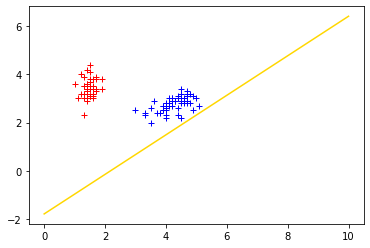

In [8]:
h = 1e-5
fig, ax = plt.subplots()

#ces variables servent à stocker le séparateur et la marge
line = np.linspace(0,10,150)
plane = np.zeros(150)
planep = np.zeros(150)
planem = np.zeros(150)

#Partie animation
import imageio
name = 'mes_images'
images = []

#Fonction pour une itération de descente de gradient Soft SVM
def grad_iter (a, x, y, F, J, h):
    b = a - h*J(a,x,y)
    for i in range(len(y)):
        if b[i] < 0:
            b[i] = 0
        elif b[i] > C:
            b[i] = C
    return b

#Fonction pour une itération de descente de gradient Hard SVM
def grad_iter_h (a, x, y, F, J, h):
    b = a - h*J(a,x,y)
    for i in range(len(y)):
        if b[i] < 0:
            b[i] = 0
    return b

#descente complète
def grad_descent (a, x, y, F, J, h):
    i = 0
    while (np.linalg.norm(J(a,x,y)) > 1) and (i < 100):
        #recherche du pas optimal
        jac = J(a,x,y)
        #m = F(a - h*jac, x, y)
        #for n in range(-50,250):
        #    r = F(a - jac*(10**(-n*0.1)), x, y)
        #    if (r < m):
        #        m = r
        #        h = 10**(-n*0.1)
        #print("\n", h, "\n")
        
        #iteration descente de gradient
        
        a = grad_iter_h(a,x,y,F,J,h)
        #a = grad_iter(a,x,y,F,J,h)
        i += 1
        
        #affectation de w, b, et les plane*
        w =  np.zeros(len(x[0]))
        b = 0.
        for n in range(len(x)):
            if a[n] != 0.:
                w += a[n]*y[n]*x[n]
        
        #pour b en HARD SVM: normaliser par rapport à la marge : b tq min(yi(<xi,w>) + b) = 1
        #si yi = 1, <xi,w> + b >= 1 b >= 1/yi - <w,xi>
        #si yi = -1 b <= 1/yi - <w,xi>
        #b = max(sign(yi)(1/yi-<xi,w>))
    
        b = 0
        for n in range(len(x)):
            r = (y[n]/abs(y[n]))*((1/y[n])-np.dot(x[n],w))
            if r > b :
                b = r
        
        for n in range(150):
            plane[n] = -(w[0]*line[n] + b)/w[1]
            #<w,x> + b = 1
            # w1*x1 + w2*x2 + b = 1
            planep[n] = -(w[0]*line[n] + b)/w[1] + 1/w[1]
            planem[n] = -(w[0]*line[n] + b)/w[1] - 1/w[1]
        
        print(w, b, "gradient : ", np.linalg.norm(jac), "  n°", i)
                
        #clear puis affichage du nouveau plot
        fig.clear(True)
        plt.plot(red, redy, 'r+')
        plt.plot(blue, bluy, 'b+')
        plt.plot(line, plane, 'gold')
        plt.plot(line, planep, ':', color='gold')
        plt.plot(line, planem,  ':', color='gold')
        plt.savefig(name+str(i)+'.png')
        images.append(imageio.imread(name+str(i)+'.png'))
        
        #print(a)
    #print(np.linalg.norm(J(a,x,y)))
    return a

#on applique le tout pour de vrai
print("a = ", a)
a = grad_descent(a,x,y,lagrangien,lagranJ,h)
print("a = ", a)
imageio.mimsave('demo.gif', images, fps = 100)

## SVM avec sklearn

In [50]:
#Les imports
from sklearn.svm import SVC
from sklearn import svm

In [51]:
#fonction qui affiche les données IRIS

def plot_donnees(d1, d2):
    d1=1
    d2=2
    
    bl1=[]
    bl2=[]
    
    gr1=[]
    gr2=[]
    
    yel1=[]
    yel2=[]
    
    n=np.shape(iris.data[:,0])[0]
    for i in range(n):
        if iris.target[i]==0 :
            bl1+=[iris.data[i,d1]]
            bl2+=[iris.data[i,d2]]
        elif iris.target[i]==1 :
            gr1+=[iris.data[i,d1]]
            gr2+=[iris.data[i,d2]]
        elif iris.target[i]==2 :
            yel1+=[iris.data[i,d1]]
            yel2+=[iris.data[i,d2]]
            
    plt.figure(figsize=(15,15))
    fig, ax = plt.subplots()

    plt.plot(bl1, bl2, 'b+')   #setosa
    plt.plot(gr1, gr2, 'g+')   #versicolor
    plt.plot(yel1, yel2, 'y+') #virginica

### Hyperplan avec scikit-learn

Marge : 1.214285911893179


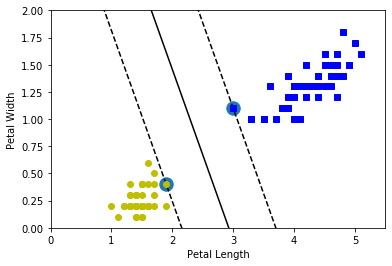

In [52]:
x=iris["data"][:,(2,3)]
y=iris["target"]

setosa_or_versicolor = (y==0) | (y==1)
x = x[setosa_or_versicolor]
y = y[setosa_or_versicolor]

clf=SVC(kernel = 'linear', gamma = 'auto', C=float('inf'))
clf.fit(x,y)

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    
    x=iris["data"][:,(2,3)]
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 -b/w[1]
    
    margin = 1/w[1]
    print("Marge : " + str(margin))
    upper_margin = decision_boundary + margin
    lower_margin = decision_boundary - margin
    
    #supportVectors = svm_clf.support_vectors_
    support_vector_indices = np.where(np.abs(svm_clf.decision_function(x)) <= 1)[0]
    supportVectors = x[support_vector_indices]
    plt.scatter(supportVectors[:,0], supportVectors[:,1], s=180)
    plt.plot(x0, decision_boundary, "k-")
    plt.plot(x0, upper_margin, "k--")
    plt.plot(x0, lower_margin, "k--")
    
plt.figure()

plot_svc_decision_boundary(svm_clf=clf, xmin=0, xmax=5.5)
plt.plot(x[:,0][y==1], x[:, 1][y==1], "bs")
plt.plot(x[:,0][y==0], x[:, 1][y==0], "yo")
plt.axis([0, 5.5, 0, 2])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

### Le Soft SVM

C:\Users\teaca\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Marge : 0.6841744295217093
Marge : 0.3352640364743126


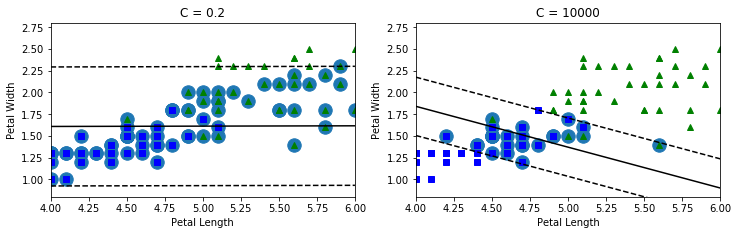

In [53]:
from sklearn.svm import LinearSVC

x=iris["data"][:,(2,3)]
y=(iris["target"]==2).astype(np.float64)

#hinge : standard SVM loss
svm_clf1 = LinearSVC(C =0.2 , loss = "hinge", max_iter=10000)
svm_clf2 = LinearSVC(C =10000 , loss = "hinge")

svm_clf1.fit(x,y)
svm_clf2.fit(x,y)

plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(x[:, 0][y==1], x[:,1][y==1], "g^")
plt.plot(x[:, 0][y==0], x[:,1][y==0], "bs")
plot_svc_decision_boundary(svm_clf=svm_clf1, xmin=4, xmax=6)
plt.title("C = 0.2")
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(x[:,0][y==1], x[:,1][y==1], "g^")
plt.plot(x[:, 0][y==0], x[:,1][y==0], "bs")
plot_svc_decision_boundary(svm_clf=svm_clf2, xmin=4, xmax=6)
plt.title("C = 10000")
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.axis([4, 6, 0.8, 2.8])
plt.show()

### Les SVM non linéaires

<Figure size 1080x1080 with 0 Axes>

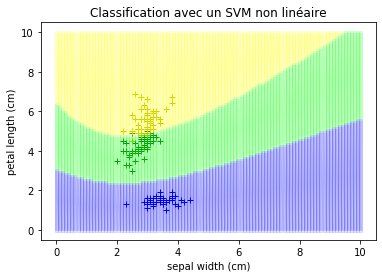

In [49]:
x = iris.data[:,1:3]
y = iris.target
clf=svm.SVC(kernel = 'poly', gamma = 'auto')
clf.fit(x,y)
SVC()

Liste_1=[]
Liste_2=[]
Liste_3=[]
points=np.linspace(0,10,100)
for i in points:
    for j in points:
        if (clf.predict([[i,j]]))==1:
            Liste_1+=[[i,j]]
        elif (clf.predict([[i,j]]))==2 :
            Liste_2+=[[i,j]]
        else :
            Liste_3+=[[i,j]]

Liste_1=np.array(Liste_1)
Liste_2=np.array(Liste_2)
Liste_3=np.array(Liste_3)

plot_donnees(1,2)

plt.plot(Liste_1[:,0], Liste_1[:,1], marker = 's', ms = 3, color=[0,1,0,0.1])
plt.plot(Liste_2[:,0], Liste_2[:,1], marker = 's', ms = 3, color=[1,1,0,0.1])
plt.plot(Liste_3[:,0], Liste_3[:,1], marker = 's', ms = 3, color=[0,0,1,0.1])

plt.xlabel('sepal width (cm)')
plt.ylabel('petal length (cm)')
plt.title("Classification avec un SVM non linéaire")
plt.show()

## Neural Network

In [55]:
import torch as tr
import math
#from torchvision import datasets
print("welcome to black space")
#mnist = datasets.MNIST('./data', download=True)

welcome to black space


Result: y = -0.14132557809352875 x[:,0] + -0.15635453164577484 x[:,1]


<Figure size 1080x1080 with 0 Axes>

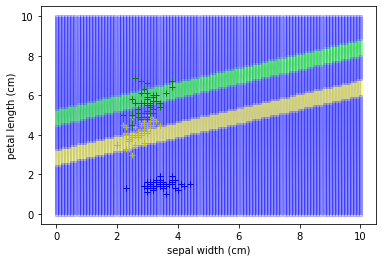

<Figure size 1080x10800 with 0 Axes>

In [44]:
x = iris.data
y = iris.target

x = tr.as_tensor(x[:,1:3]).float()
y = tr.as_tensor(y).float()


# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. The Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
# The Flatten layer flatens the output of the linear layer to a 1D tensor,
# to match the shape of `y`.
model = tr.nn.Sequential(
    tr.nn.Linear(2, 1),
    tr.nn.GELU(),
    tr.nn.ReLU(inplace=False),
    tr.nn.Flatten(0, 1),
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = tr.nn.MSELoss(reduction='sum')

learning_rate = 1e-6
for t in range(2000):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(x)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    #if t % 100 == 99:
        #print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with tr.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result: y = {linear_layer.bias.item()} x[:,0] + {linear_layer.weight[:, 0].item()} x[:,1]')


Liste_1=[]
Liste_2=[]
Liste_3=[]
points=np.linspace(0,10,100)
for i in points:
    for j in points:
        ts = tr.as_tensor([[i,j]]).float()
        if abs(model(ts) - 2)<0.2:
            Liste_1+=[[i,j]]
        elif abs(model(ts) - 1)<0.2 :
            Liste_2+=[[i,j]]
        else :
            Liste_3+=[[i,j]]

Liste_1=np.array(Liste_1)
Liste_2=np.array(Liste_2)
Liste_3=np.array(Liste_3)

#plot des données
plot_donnees(1,2)

plt.plot(Liste_1[:,0], Liste_1[:,1], marker = 's', ms = 3, color=[0,1,0,0.2])
plt.plot(Liste_2[:,0], Liste_2[:,1], marker = 's', ms = 3, color=[1,1,0,0.2])
plt.plot(Liste_3[:,0], Liste_3[:,1], marker = 's', ms = 3, color=[0,0,1,0.2])

#données IRIS
plt.plot(red1, red2, 'b+')
plt.plot(blue1, blue2, 'y+')
plt.plot(green1,green2, 'g+')
plt.xlabel('sepal width (cm)')
plt.ylabel('petal length (cm)')
plt.title('Classification avec un Réseau de neurones')
plt.show()